# Heart disease analysis Using different model

In the dataset we have some patient clinical report, We have to predict they have heart disease or not?

# Load the data

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("heart.csv")

In [134]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


# Data Description

 **1. age**: The person's age in years

 **2. sex**: The person's sex (1 = male, 0 = female)

 **3. cp**: Chest pain type 
            * 0: Typical angina: chest pain related decrease blood supply to the heart
            * 1: Atypical angina: chest pain not related to heart
            * 2: Non-anginal pain: typically esophageal spasms (non heart related)
            * 3: Asymptomatic: chest pain not showing signs of disease
            
**4. trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**5. chol**: The person's cholesterol measurement in mg/dl

**6. fbs**: the perdon's fasting blood sugar > 120 mg/dl. (1 = true; 0 = false)

**7. restecg**: Resting electrocardiographic results

     0: Nothing to note
     1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
**8. thalach**: Maximum heart rate achieved

**9. exang**: Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak**: - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope**: - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
**12. ca**: Number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
**13. thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
**14. target**: Person have disease or not (1=yes, 0=no) (= the predicted attribute)

In [135]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [136]:
df.shape

(303, 14)

# Data Profiling

In [137]:
import pandas_profiling

In [138]:
profile = pandas_profiling.ProfileReport(df)
profile

# Feature Selection

### Univariate selection

Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable.

In [139]:
#X= df.drop(['target'], axis=1)
#y= df['target']
x = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [141]:
BestFeature = SelectKBest(score_func=f_classif, k=10)
fit = BestFeature.fit(x,y)

In [142]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [143]:
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

In [144]:
featureScores

,Column,Score
0,age,16.12
1,sex,25.79
2,cp,69.77
3,trestbps,6.46
4,chol,2.20
5,fbs,0.24
6,restecg,5.78
7,thalach,65.12
8,exang,70.95
9,oldpeak,68.55


In [145]:
print(featureScores.nlargest(10,'Score'))

      Column  Score
8      exang  70.95
2         cp  69.77
9    oldpeak  68.55
7    thalach  65.12
11        ca  54.56
10     slope  40.90
12      thal  40.41
1        sex  25.79
0        age  16.12
3   trestbps   6.46


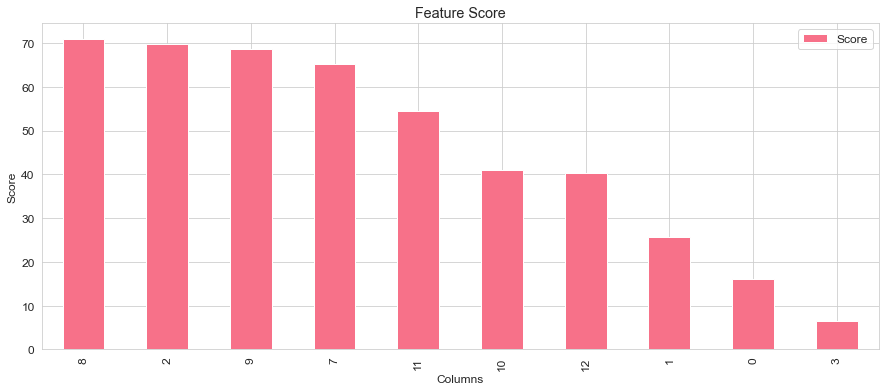

In [146]:
featureScores.nlargest(10,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

### Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [147]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

Num Features: 3
Selected Features: [False  True False False False False False False  True False  True False
 False]
Feature Ranking: [10  1  4  8 11  9  6  7  1  5  1  3  2]


Here top 3 freature is 'cp', 'oldpeak' and 'ca' 

### Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
print(model.feature_importances_)

[0.07197535 0.05612282 0.18729178 0.05955049 0.05059546 0.02064095
 0.03098858 0.07148094 0.07105901 0.08379782 0.06476979 0.14544202
 0.08628499]


# Scalling The Data
### Normalize the data into 0 and 1

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal','trestbps','chol','fbs','restecg'] #,'trestbps','chol','fbs','restecg'
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [151]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,0.68,1.97,0.76,-0.26,2.39,-1.01,0.02,-0.70,1.09,-2.27,-0.71,-2.15,1
1,-1.92,0.68,1.00,-0.09,0.07,-0.42,0.90,1.63,-0.70,2.12,-2.27,-0.71,-0.51,1
2,-1.47,-1.47,0.03,-0.09,-0.82,-0.42,-1.01,0.98,-0.70,0.31,0.98,-0.71,-0.51,1
3,0.18,0.68,0.03,-0.66,-0.20,-0.42,0.90,1.24,-0.70,-0.21,0.98,-0.71,-0.51,1
4,0.29,-1.47,-0.94,-0.66,2.08,-0.42,0.90,0.58,1.44,-0.38,0.98,-0.71,-0.51,1


In [152]:
X= df.drop(['target'], axis=1) #,'trestbps','chol','fbs','restecg'
y= df['target']

In [153]:
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [154]:
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


# Logistic regration

In [155]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=999)
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

y_pred_quant1 = model1.predict_proba(X_test)[:, 1]

In [156]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction1)
cm

array([[35,  5],
       [ 2, 49]], dtype=int64)

Details of confusion matricx
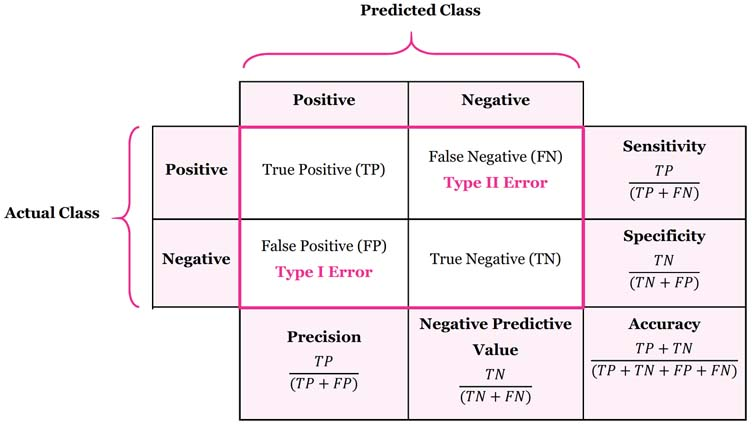

<AxesSubplot:>

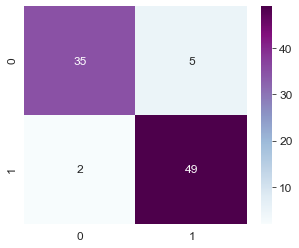

In [157]:
plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="BuPu")


In [158]:
#Accuricy using matrics
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [159]:
from sklearn.metrics import accuracy_score

accuracies = {}

acc = accuracy_score(y_test,prediction1)*100
accuracies['Logistic Regration'] = acc
acc

92.3076923076923

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.91      0.96      0.93        51

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



# Dicision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=999)
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

y_pred_quant2 = model2.predict_proba(X_test)[:, 1]

# probs = model.predict_proba(X_test)
# probs = probs[:, 1]
# loss = log_loss(testy, probs)
# loss

In [162]:
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[32,  8],
       [13, 38]], dtype=int64)

In [163]:
acc = accuracy_score(y_test,prediction2)*100
accuracies['Dicision Tree'] = acc
acc

76.92307692307693

In [164]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        40
           1       0.83      0.75      0.78        51

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=300)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

y_pred_quant3 = model3.predict_proba(X_test)[:, 1]

cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[34,  6],
       [ 6, 45]], dtype=int64)

In [166]:
acc = accuracy_score(y_test, prediction3)*100
accuracies['Random Forest'] = acc
acc

86.81318681318682

In [167]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# Support Vector machine

In [168]:
from sklearn.svm import SVC

svm=SVC(probability=True)
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)

y_pred_quant4 = model4.predict_proba(X_test)[:, 1]

cm4= confusion_matrix(y_test,prediction4)
cm4

array([[31,  9],
       [ 4, 47]], dtype=int64)

In [169]:
acc = accuracy_score(y_test, prediction4)*100
accuracies['Support Vector Machine'] = acc
acc

85.71428571428571

In [170]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        40
           1       0.84      0.92      0.88        51

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



# Gaussion NB

In [171]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)

y_pred_quant5 = model5.predict_proba(X_test)[:, 1]

cm5= confusion_matrix(y_test, prediction5)
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [172]:
acc = accuracy_score(y_test, prediction5)*100
accuracies['Gaussion NB'] = acc
acc

87.91208791208791

In [173]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



# K nearest neighbor

In [174]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=103)
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)

y_pred_quant6 = model6.predict_proba(X_test)[:, 1]

cm6= confusion_matrix(y_test, prediction6)
cm6

array([[32,  8],
       [ 1, 50]], dtype=int64)

In [175]:
acc = accuracy_score(y_test, prediction6)*100
accuracies['K nearest neighbor'] = acc
acc

90.10989010989012

In [176]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.86      0.98      0.92        51

    accuracy                           0.90        91
   macro avg       0.92      0.89      0.90        91
weighted avg       0.91      0.90      0.90        91



# Comparing Model

In [177]:
print('Logistic Regration - lr :', accuracy_score(y_test, prediction1) * 100)
print('Dicission Tree - dtc :', accuracy_score(y_test, prediction2) * 100)
print('Random Forrest - rfc :', accuracy_score(y_test, prediction3) * 100)
print('Support vector Machine - svm: ', accuracy_score(y_test, prediction4) * 100)
print('Gaussion NB - NB :', accuracy_score(y_test, prediction5) * 100)
print('K Nearest - KNN :', accuracy_score(y_test, prediction6) * 100)

Logistic Regration - lr : 92.3076923076923
Dicission Tree - dtc : 76.92307692307693
Random Forrest - rfc : 86.81318681318682
Support vector Machine - svm:  85.71428571428571
Gaussion NB - NB : 87.91208791208791
K Nearest - KNN : 90.10989010989012


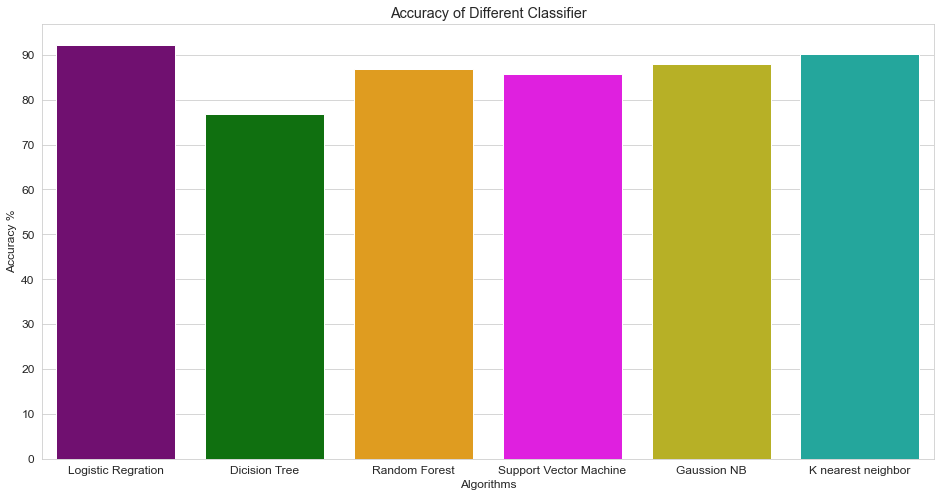

In [178]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy of Different Classifier")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

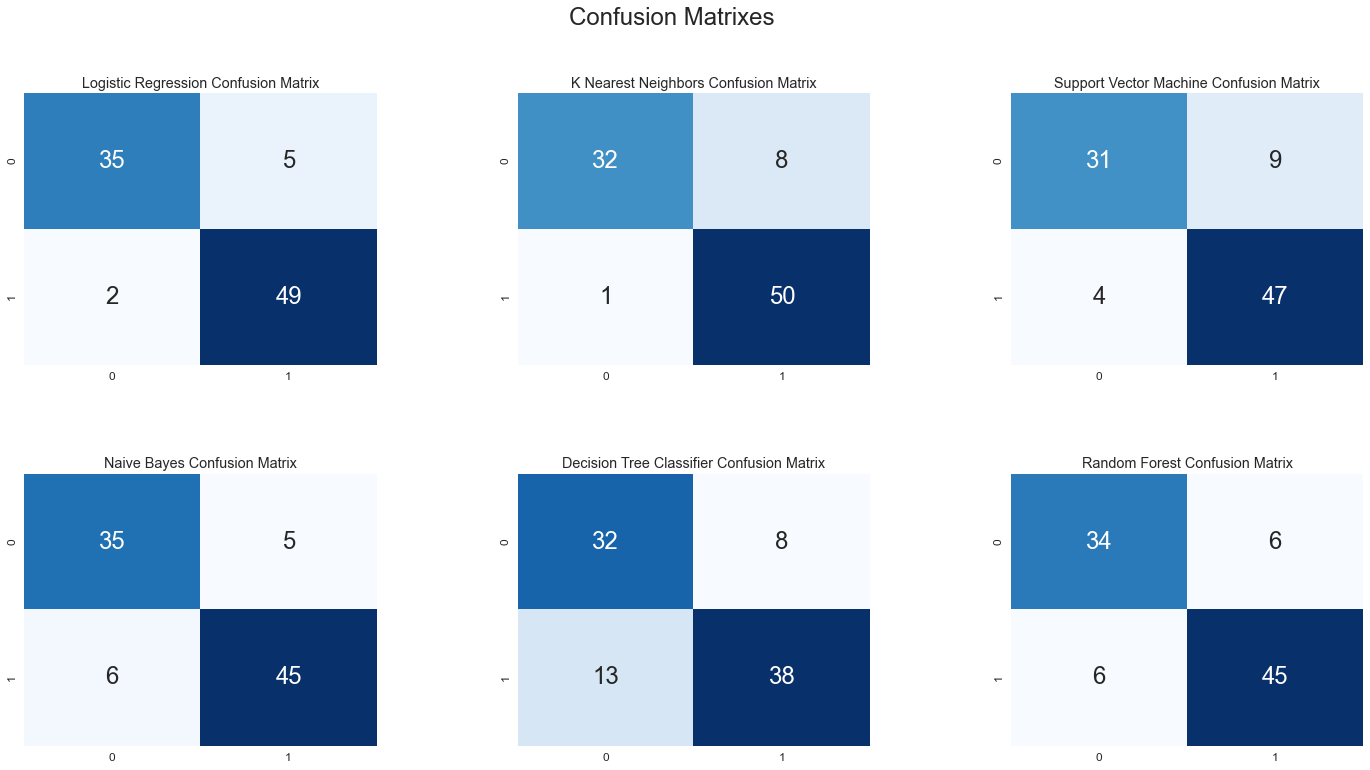

In [179]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()

Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as

Sensitivity=TruePositives / TruePositives + FalseNegatives 

Specificity=TrueNegatives / TrueNegatives + FalsePositives

# Sensitivity

In [180]:
sensitivitys = {}

sensitivity = (cm[0,0]/(cm[0,0]+cm[1,0]))*100
print('Sensitivity of Logistic Regression : ', sensitivity )
sensitivitys['Logistic Regration'] = sensitivity

sensitivity = (cm2[0,0]/(cm2[0,0]+cm2[1,0]))*100
print('Sensitivity of Decision Tree Classifier : ', sensitivity )
sensitivitys['Decision Tree Classifier'] = sensitivity

sensitivity = (cm3[0,0]/(cm3[0,0]+cm3[1,0]))*100
print('Sensitivity of Random Forest : ', sensitivity )
sensitivitys['Random Forest'] = sensitivity

sensitivity = (cm4[0,0]/(cm4[0,0]+cm4[1,0]))*100
print('Sensitivity of Support Vector Machine: ', sensitivity )
sensitivitys['Support Vector Machine'] = sensitivity

sensitivity = (cm5[0,0]/(cm5[0,0]+cm5[1,0]))*100
print('Sensitivity of Naive Bayes : ', sensitivity )
sensitivitys['Naive Bayes'] = sensitivity

sensitivity = (cm6[0,0]/(cm6[0,0]+cm6[1,0]))*100
print('Sensitivity of K Nearest Neighbors : ', sensitivity )
sensitivitys['K Nearest Neighbors'] = sensitivity

Sensitivity of Logistic Regression :  94.5945945945946
Sensitivity of Decision Tree Classifier :  71.11111111111111
Sensitivity of Random Forest :  85.0
Sensitivity of Support Vector Machine:  88.57142857142857
Sensitivity of Naive Bayes :  85.36585365853658
Sensitivity of K Nearest Neighbors :  96.96969696969697


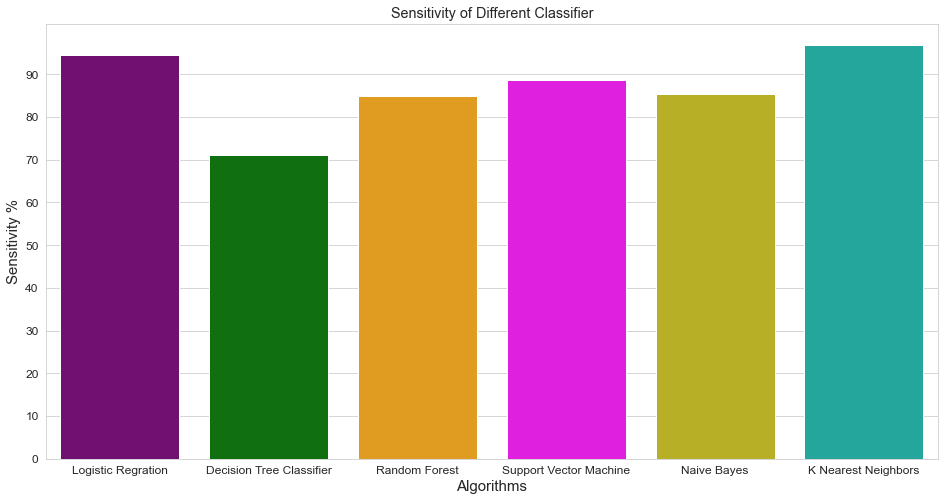

In [237]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Sensitivity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Sensitivity of Different Classifier")
sns.barplot(x=list(sensitivitys.keys()), y=list(sensitivitys.values()), palette=colors)

plt.show()

# Specificity

In [182]:
specificitys = {}

specificity = (cm[1,1]/(cm[1,1]+cm[0,1]))*100
print('Specificity of Logistic Regression : ', specificity)
specificitys['Logistic Regression'] = specificity

specificity = (cm2[1,1]/(cm2[1,1]+cm2[0,1]))*100
print('specificity of Decision Tree Classifier : ', specificity )
specificitys['Decision Tree'] = specificity

specificity = (cm3[1,1]/(cm3[1,1]+cm3[0,1]))*100
print('specificity of Random Forest : ', specificity )
specificitys['Random Forest'] = specificity

specificity = (cm4[1,1]/(cm4[1,1]+cm4[0,1]))*100
print('specificity of Support Vector Machine: ', specificity )
specificitys['Support Vector Machine'] = specificity

specificity = (cm5[1,1]/(cm5[1,1]+cm5[0,1]))*100
print('specificity of Naive Bayes : ', specificity )
specificitys['Naive Bayes'] = specificity

specificity = (cm6[1,1]/(cm6[1,1]+cm6[0,1]))*100
print('specificity of K Nearest Neighbors : ', specificity )
specificitys['K Nearest Neighbors'] = specificity

Specificity of Logistic Regression :  90.74074074074075
specificity of Decision Tree Classifier :  82.6086956521739
specificity of Random Forest :  88.23529411764706
specificity of Support Vector Machine:  83.92857142857143
specificity of Naive Bayes :  90.0
specificity of K Nearest Neighbors :  86.20689655172413


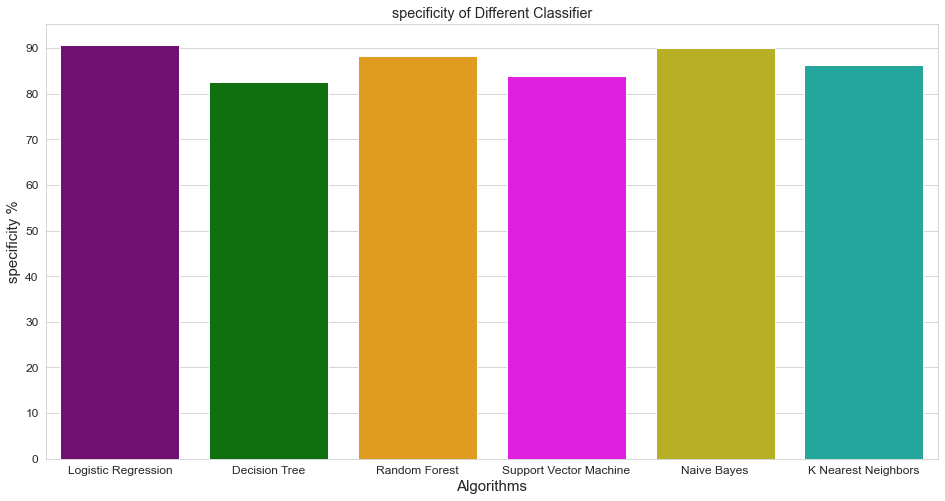

In [234]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("specificity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("specificity of Different Classifier")
sns.barplot(x=list(specificitys.keys()), y=list(specificitys.values()), palette=colors)
plt.show()

# ROC curve

In [184]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

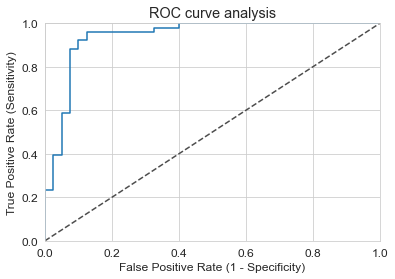

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail

AUC of LogisticRegression()  is :  94.11764705882352
AUC of DecisionTreeClassifier()  is :  73.33333333333333
AUC of RandomForestClassifier()  is :  93.2107843137255
AUC of SVC(probability=True)  is :  93.33333333333333
AUC of GaussianNB()  is :  94.80392156862744
AUC of KNeighborsClassifier()  is :  90.83333333333333


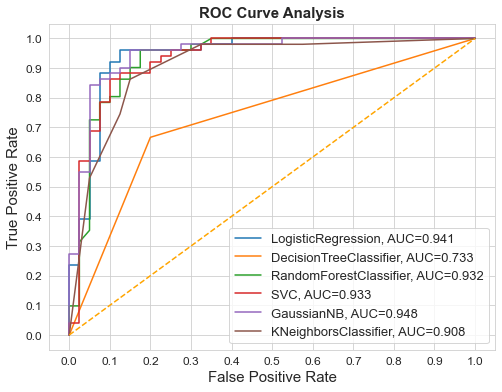

In [186]:
ROC_Curve = {}

# Instantiate the classifiers and make a list
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(probability=True),
               GaussianNB(),
               KNeighborsClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    print("AUC of", cls ," is : ", auc * 100)
    ROC_Curve[cls] = auc * 100
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)
    

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

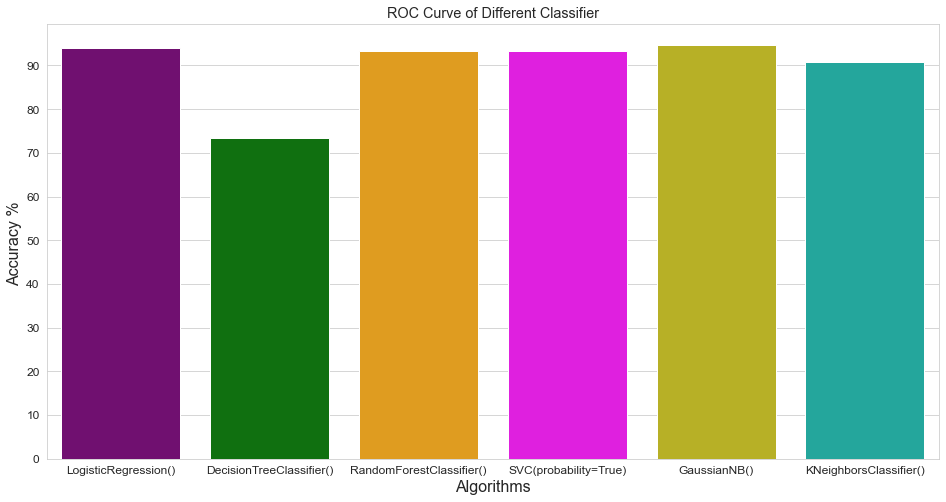

In [229]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 16)
plt.xlabel("Algorithms", fontsize = 16)
plt.title("ROC Curve of Different Classifier")
sns.barplot(x=list(ROC_Curve.keys()), y=list(ROC_Curve.values()), palette=colors)

plt.show()

# Log loss

Log loss, also called “logistic loss,” “logarithmic loss,” or “cross entropy” can be used as a measure for evaluating predicted probabilities.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

A model with perfect skill has a log loss score of 0.0.

In order to summarize the skill of a model using log loss, the log loss is calculated for each predicted probability, and the average loss is reported.

In [188]:
from sklearn.metrics import log_loss

logLoss = {}

loss = log_loss(y_test, y_pred_quant1) 
print('Loss of Logistic Regression : ', loss)
logLoss['Logistic Regression'] = loss

loss = log_loss(y_test, y_pred_quant2)
print('Loss of Decision Tree Classifier : ', loss )
logLoss['Decision Tree'] = loss

loss = log_loss(y_test, y_pred_quant3) 
print('Loss of Random Forest : ', loss )
logLoss['Random Forest'] = loss

loss = log_loss(y_test, y_pred_quant4) 
print('Loss of Support Vector Machine: ', loss )
logLoss['Support Vector Machine'] = loss

loss = log_loss(y_test, y_pred_quant5)
print('Loss of Naive Bayes : ', loss )
logLoss['Naive Bayes'] = loss

loss = log_loss(y_test, y_pred_quant6)
print('Loss of K Nearest Neighbors : ', loss )
logLoss['K Nearest Neighbors'] = loss

Loss of Logistic Regression :  0.3001326578866009
Loss of Decision Tree Classifier :  7.970557154643582
Loss of Random Forest :  0.3540603142337175
Loss of Support Vector Machine:  0.33146533802992706
Loss of Naive Bayes :  0.32747701178619726
Loss of K Nearest Neighbors :  0.4762228210406868


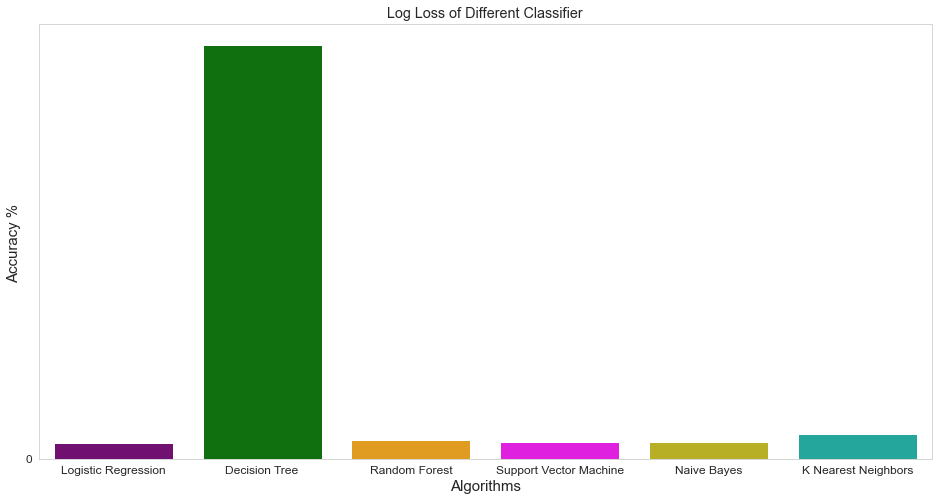

In [231]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Log Loss of Different Classifier")
sns.barplot(x=list(logLoss.keys()), y=list(logLoss.values()), palette=colors)
plt.show()

# Kappa Statistics

Cohen’s kappa: a statistic that measures inter-annotator agreement.

This function computes Cohen’s kappa [1], a score that expresses the level of agreement between two annotators on a classification problem. It is defined as

where  is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and  is the expected agreement when both annotators assign labels randomly.  is estimated using a per-annotator empirical prior over the class labels [2].

Classification metrics can't handle a mix of binary and continuous targets -- 

Means it only works in regrassion in classification it is worthless

In [190]:
from sklearn.metrics import cohen_kappa_score

In [233]:
#cohen_score = cohen_kappa_score(y_test, y_pred_quant6,  labels=None, weights=None)
#cohen_score